In [4]:
pip install seaborn matplotlib pandas


# Import Required Libraries
Import the necessary libraries, including pandas, matplotlib, and seaborn.

In [5]:
# Import the necessary libraries
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
import seaborn as sns  # For making statistical graphics

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Load the Dataset and Show the first 10 rows
Load the DDoS dataset from a CSV file.
Show the dataset using data.head(10)


In [7]:
# Load the dataset
data = pd.read_csv('/content/DDoS_dataset.csv')

# Display the first 10 rows of the dataset
print("First 10 rows of the dataset:")
print(data.head(10))

# Check for missing values in specific columns
print("Missing values in specific columns:")
print(data[['Source Port', 'Dest Port', 'Packet Length', 'Packets/Time', 'target']].isnull().sum())

# Drop rows with missing values in specific columns
data = data.dropna(subset=['Source Port', 'Dest Port', 'Packet Length', 'Packets/Time', 'target'])

First 10 rows of the dataset:
  Highest Layer Transport Layer  Source IP       Dest IP  Source Port  \
0           ARP             UDP          1   192.168.1.1            0   
1           ARP             UDP          0  192.168.1.10            0   
2           ARP             UDP          1   192.168.1.1            0   
3           ARP             UDP          0  192.168.1.12            0   
4           ARP             UDP          1   192.168.1.1            0   
5           ARP             UDP          0  192.168.1.11            0   
6           ARP             UDP          1   192.168.1.1            0   
7           ARP             UDP          0  192.168.1.10            0   
8           ARP             UDP          1   192.168.1.1            0   
9           ARP             UDP          0  192.168.1.10            0   

   Dest Port  Packet Length  Packets/Time  target  
0          0             60          92.8       1  
1          0             42          92.9       0  
2         

# Check for Missing Values
Check for missing values in specific columns to ensure data quality.

In [ ]:
# Check for missing values in specific columns to ensure data quality
print("Missing values in specific columns:")
missing_values = data[['Source Port', 'Dest Port', 'Packet Length', 'Packets/Time', 'target']].isnull().sum()
print(missing_values)

# Comment: Checking for missing values in critical columns like 'Source Port', 'Dest Port', 'Packet Length', 'Packets/Time', and 'target' is essential to ensure data quality. Missing values can lead to inaccurate analysis and misleading visualizations.

# Drop Rows with Missing Values
Drop rows with missing values in specific columns to clean the dataset.

In [ ]:
# Drop rows with missing values in specific columns to clean the dataset
data = data.dropna(subset=['Source Port', 'Dest Port', 'Packet Length', 'Packets/Time', 'target'])

# Display the first 10 rows of the cleaned dataset
print("First 10 rows of the cleaned dataset:")
display(data.head(10))  # Using display() for better visualization in Jupyter notebook

# Comment: Dropping rows with missing values in critical columns ensures that our dataset is clean and ready for analysis. This step is crucial to avoid any potential issues during data visualization and analysis.

# Plot Distribution of Normal vs DDoS Traffic
Plot a pie chart to show the distribution of normal vs DDoS traffic.

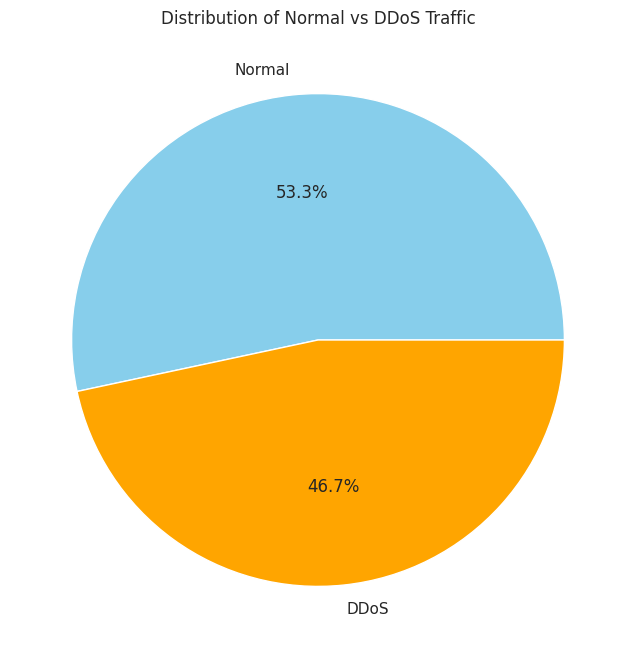

In [9]:
# Plot Distribution of Normal vs DDoS Traffic

# Calculate the distribution of normal vs DDoS traffic
target_counts = data['target'].value_counts()

# Plot a pie chart to show the distribution
plt.figure(figsize=(8, 8))
target_counts.plot.pie(autopct='%1.1f%%', labels=['Normal', 'DDoS'], colors=['skyblue', 'orange'])
plt.title('Distribution of Normal vs DDoS Traffic')
plt.ylabel('')  # Hide the y-label for better visualization
plt.show()

# Comment: The pie chart above shows the distribution of normal vs DDoS traffic in the dataset. This visualization helps us understand the proportion of normal traffic compared to DDoS attacks, which is crucial for analyzing the impact and frequency of DDoS attacks in the network.

# Plot Most Common Transport Protocols
Plot a bar chart to show the most common transport protocols used in the dataset.

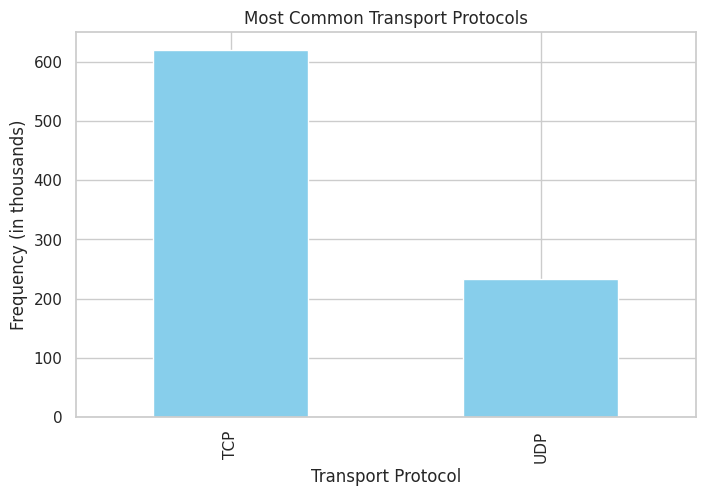

In [8]:
# Plot Most Common Transport Protocols

# Calculate the frequency of each transport protocol
transport_counts = data['Transport Layer'].value_counts()

# Convert counts to thousands for better visualization
transport_counts = transport_counts.apply(lambda x: x / 1000)

# Plot a bar chart to show the most common transport protocols
plt.figure(figsize=(8, 5))
transport_counts.plot(kind='bar', color='skyblue')
plt.title('Most Common Transport Protocols')
plt.xlabel('Transport Protocol')
plt.ylabel('Frequency (in thousands)')
plt.show()

# Comment: The bar chart above shows the most common transport protocols used in the dataset. By visualizing the frequency of each protocol, we can identify which protocols are most frequently used in the network traffic. This information is valuable for understanding the network behavior and identifying potential targets for DDoS attacks.

# Plot Top 10 Targeted Destination IPs for DDoS Attacks
Plot a horizontal bar chart to show the top 10 targeted destination IPs for DDoS attacks.

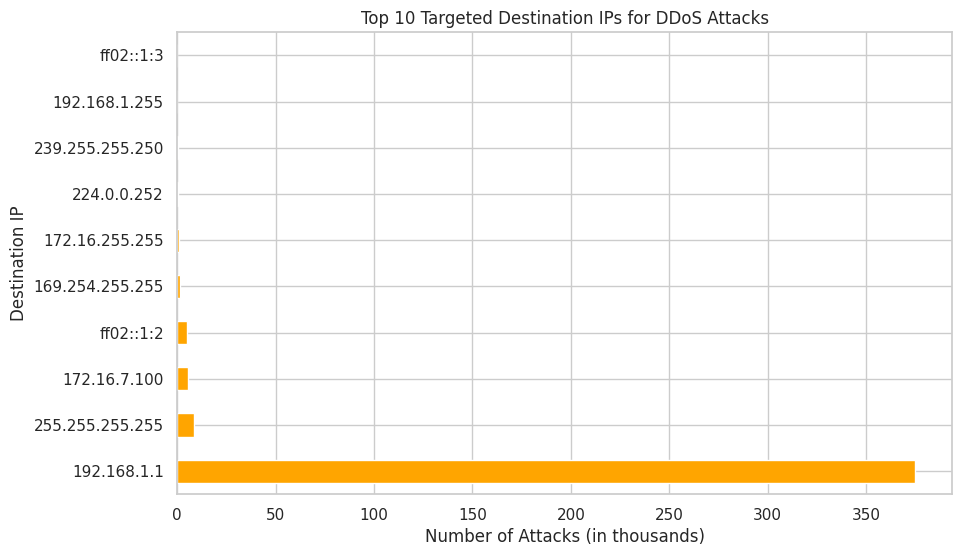

In [10]:
# Plot Top 10 Targeted Destination IPs for DDoS Attacks

# Filter the dataset to include only DDoS attack records
ddos_data = data[data['target'] == 1]

# Calculate the top 10 targeted destination IPs for DDoS attacks
top_ddos_targets = ddos_data['Dest IP'].value_counts().head(10)

# Convert counts to thousands for better visualization
top_ddos_targets = top_ddos_targets.apply(lambda x: x / 1000)

# Plot a horizontal bar chart to show the top 10 targeted destination IPs for DDoS attacks
plt.figure(figsize=(10, 6))
top_ddos_targets.plot(kind='barh', color='orange')
plt.title('Top 10 Targeted Destination IPs for DDoS Attacks')
plt.xlabel('Number of Attacks (in thousands)')
plt.ylabel('Destination IP')
plt.show()

# Comment: The horizontal bar chart above shows the top 10 targeted destination IPs for DDoS attacks. By visualizing the most frequently targeted IPs, we can identify the primary targets of DDoS attacks in the network. This information is crucial for network administrators to implement targeted security measures and protect the most vulnerable IPs from future attacks.

# Plot Distribution of Packet Lengths
Plot a histogram to show the distribution of packet lengths in the dataset.

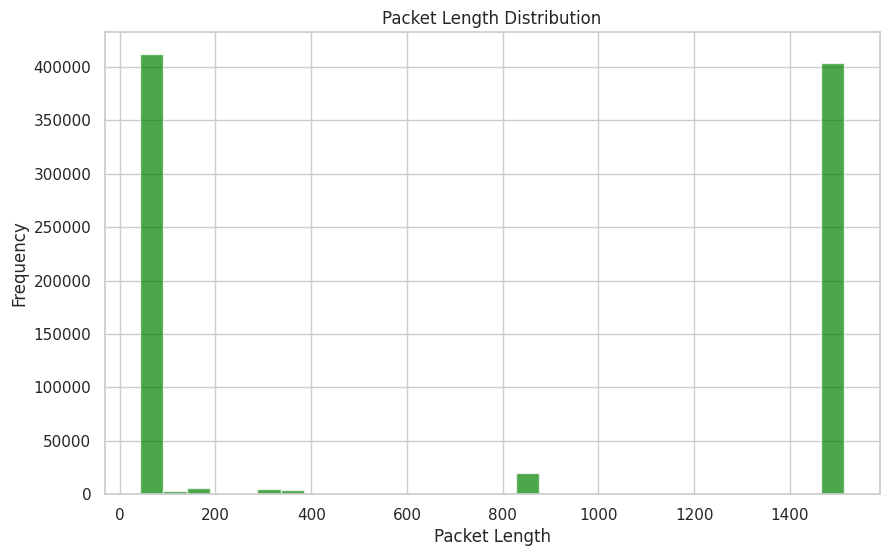

In [11]:
# Plot Distribution of Packet Lengths

# Plot a histogram to show the distribution of packet lengths in the dataset
plt.figure(figsize=(10, 6))
data['Packet Length'].plot(kind='hist', bins=30, color='green', alpha=0.7)
plt.title('Packet Length Distribution')
plt.xlabel('Packet Length')
plt.ylabel('Frequency')
plt.show()

# Comment: The histogram above shows the distribution of packet lengths in the dataset. By visualizing the packet length distribution, we can identify the most common packet sizes in the network traffic. This information is valuable for understanding the characteristics of normal traffic and DDoS attacks, as DDoS attacks may exhibit different packet length patterns compared to normal traffic.

# Create Scatter Plot of Source Port vs Destination Port
Create a scatter plot to visualize the relationship between source port and destination port.

Scatter plot data (first 5 rows):


,Source Port,Dest Port,counts
0,0,0,11494
1,68,67,8366
2,137,137,2800
3,138,138,335
4,546,547,5193


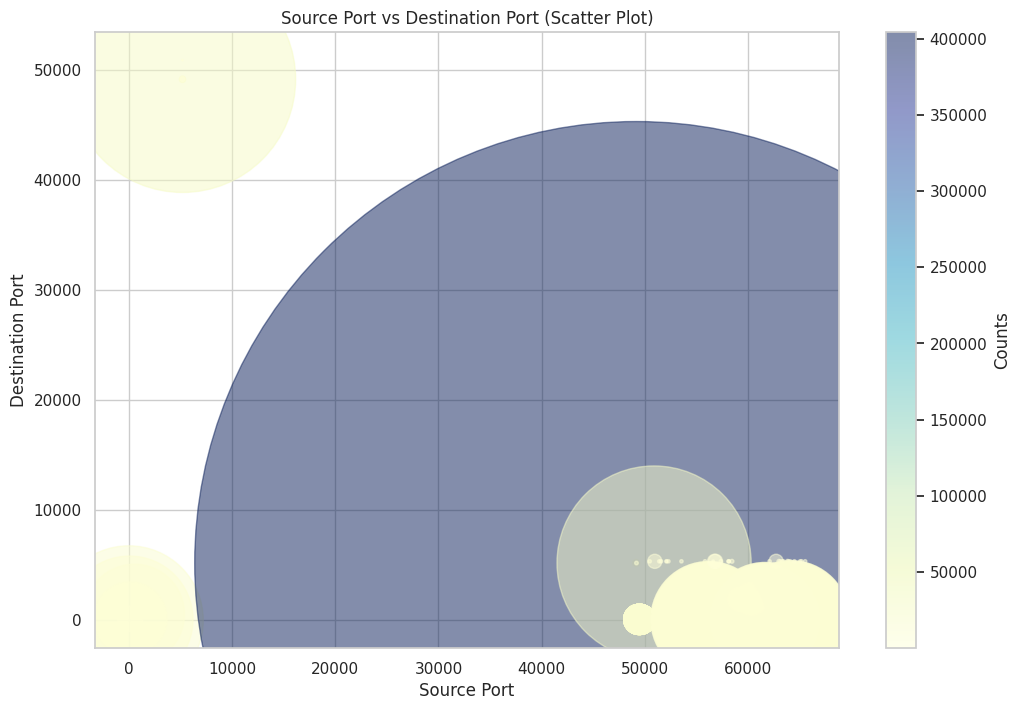

In [12]:
# Create Scatter Plot of Source Port vs Destination Port

# Group the data by 'Source Port' and 'Dest Port' and count the occurrences
scatter_data = data.groupby(['Source Port', 'Dest Port']).size().reset_index(name='counts')

# Display the first 5 rows of the scatter plot data for verification
print("Scatter plot data (first 5 rows):")
display(scatter_data.head())  # Using display() for better visualization in Jupyter notebook

# Create a scatter plot to visualize the relationship between source port and destination port
plt.figure(figsize=(12, 8))
plt.scatter(scatter_data['Source Port'], scatter_data['Dest Port'], s=scatter_data['counts'], alpha=0.5, c=scatter_data['counts'], cmap='YlGnBu')
plt.colorbar(label='Counts')
plt.title('Source Port vs Destination Port (Scatter Plot)')
plt.xlabel('Source Port')
plt.ylabel('Destination Port')
plt.show()

# Comment: The scatter plot above visualizes the relationship between source port and destination port. Each point represents a unique combination of source and destination ports, with the size and color of the points indicating the frequency of occurrences. This visualization helps us identify patterns and correlations between source and destination ports, which can be useful for analyzing DDoS attack patterns and understanding the network behavior.

# Plot Boxplot Comparing Packet Rates for Normal Traffic vs DDoS Attacks
Plot a boxplot to compare packet rates for normal traffic vs DDoS attacks.

<ipython-input-13-d466c5de8d7e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='Packets/Time', data=data, palette='Set2')


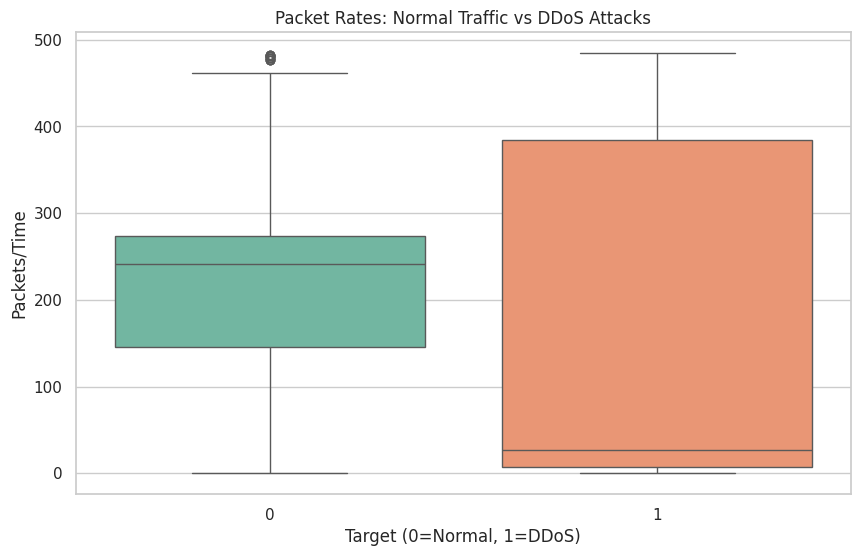

In [13]:
# Plot Boxplot Comparing Packet Rates for Normal Traffic vs DDoS Attacks

# Create a boxplot to compare packet rates for normal traffic vs DDoS attacks
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='Packets/Time', data=data, palette='Set2')
plt.title('Packet Rates: Normal Traffic vs DDoS Attacks')
plt.xlabel('Target (0=Normal, 1=DDoS)')
plt.ylabel('Packets/Time')
plt.show()

# Comment: The boxplot above compares the packet rates for normal traffic and DDoS attacks. By visualizing the distribution of packet rates for each category, we can identify differences in packet rates between normal traffic and DDoS attacks. This information is valuable for understanding the characteristics of DDoS attacks and identifying potential indicators of such attacks in the network traffic.

# Add Timestamp Column
Add a timestamp column to the dataset to analyze traffic over time.

In [14]:
# Add a timestamp column to the dataset to analyze traffic over time
data['Timestamp'] = pd.date_range(start='1/1/2021', periods=len(data), freq='T')

# Display the first 10 rows of the dataset with the new 'Timestamp' column
print("First 10 rows of the dataset with 'Timestamp' column:")
display(data.head(10))  # Using display() for better visualization in Jupyter notebook

# Comment: Adding a 'Timestamp' column to the dataset allows us to analyze the traffic over time. This is crucial for understanding the temporal patterns of network traffic and identifying periods of high activity, which can be indicative of DDoS attacks. The 'Timestamp' column is generated with a frequency of one minute, starting from '1/1/2021'.

First 10 rows of the dataset with 'Timestamp' column:


<ipython-input-14-cdc4d5b9d491>:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data['Timestamp'] = pd.date_range(start='1/1/2021', periods=len(data), freq='T')


,Highest Layer,Transport Layer,Source IP,Dest IP,Source Port,Dest Port,Packet Length,Packets/Time,target,Timestamp
0,ARP,UDP,1,192.168.1.1,0,0,60,92.8,1,2021-01-01 00:00:00
1,ARP,UDP,0,192.168.1.10,0,0,42,92.9,0,2021-01-01 00:01:00
2,ARP,UDP,1,192.168.1.1,0,0,60,362.8,1,2021-01-01 00:02:00
3,ARP,UDP,0,192.168.1.12,0,0,42,362.8,0,2021-01-01 00:03:00
4,ARP,UDP,1,192.168.1.1,0,0,60,364.3,1,2021-01-01 00:04:00
5,ARP,UDP,0,192.168.1.11,0,0,42,364.3,0,2021-01-01 00:05:00
6,ARP,UDP,1,192.168.1.1,0,0,60,365.9,1,2021-01-01 00:06:00
7,ARP,UDP,0,192.168.1.10,0,0,42,365.9,0,2021-01-01 00:07:00
8,ARP,UDP,1,192.168.1.1,0,0,60,461.7,1,2021-01-01 00:08:00
9,ARP,UDP,0,192.168.1.10,0,0,42,461.7,0,2021-01-01 00:09:00


# Plot Traffic Intensity Over Time
Plot a line chart to show the traffic intensity over time.

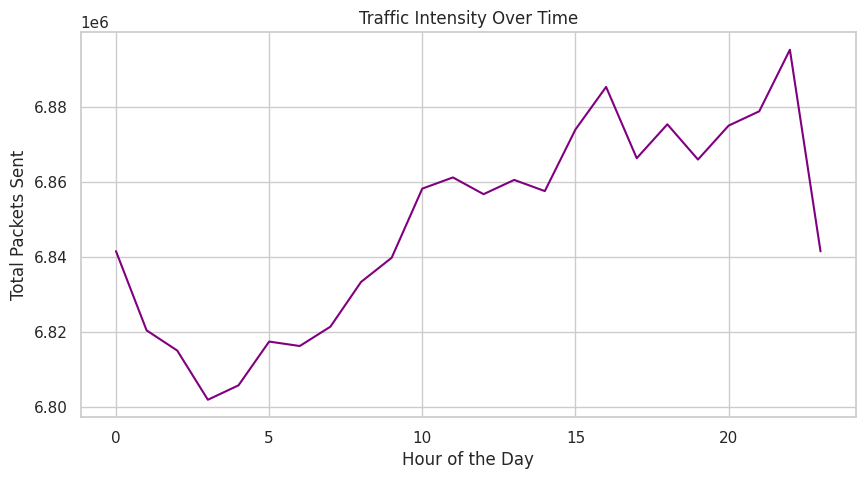

In [15]:
# Plot Traffic Intensity Over Time

# Group the data by the hour of the day and sum the 'Packets/Time' to get the traffic intensity
traffic_over_time = data.groupby(data['Timestamp'].dt.hour)['Packets/Time'].sum()

# Plot a line chart to show the traffic intensity over time
plt.figure(figsize=(10, 5))
traffic_over_time.plot(kind='line', color='purple')
plt.title('Traffic Intensity Over Time')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Packets Sent')
plt.show()

# Comment: The line chart above shows the traffic intensity over time, with the x-axis representing the hour of the day and the y-axis representing the total packets sent. This visualization helps us identify periods of high and low network activity, which can be useful for detecting unusual traffic patterns and potential DDoS attacks. By analyzing the traffic intensity over time, we can gain insights into the temporal behavior of network traffic and identify any anomalies that may indicate DDoS attacks.

# Plot KDE of Packet Length Distribution for Normal Traffic vs DDoS Attacks
Plot a KDE plot to show the packet length distribution for normal traffic vs DDoS attacks.

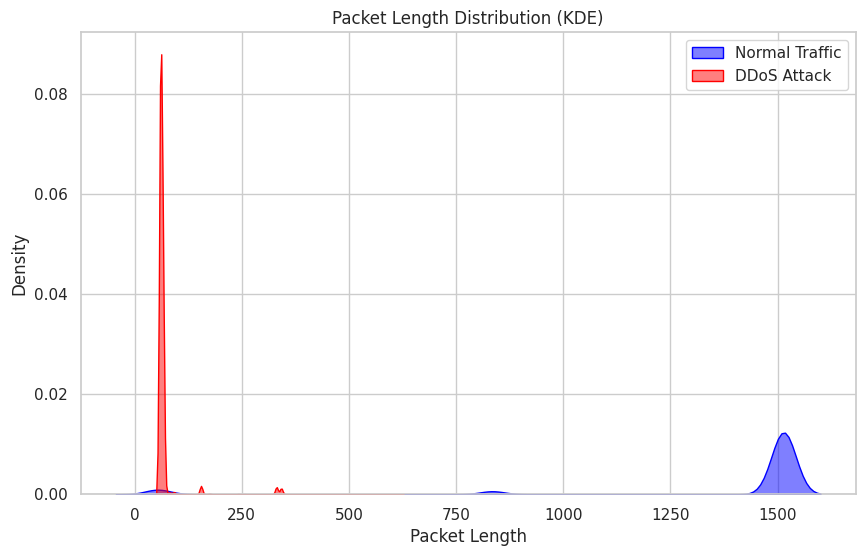

In [16]:
# Plot KDE of Packet Length Distribution for Normal Traffic vs DDoS Attacks

# Create a KDE plot to show the packet length distribution for normal traffic vs DDoS attacks
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data[data['target'] == 0]['Packet Length'], label='Normal Traffic', fill=True, alpha=0.5, color='blue')
sns.kdeplot(data=data[data['target'] == 1]['Packet Length'], label='DDoS Attack', fill=True, alpha=0.5, color='red')
plt.title('Packet Length Distribution (KDE)')
plt.xlabel('Packet Length')
plt.ylabel('Density')
plt.legend()
plt.show()

# Comment: The KDE plot above shows the packet length distribution for normal traffic and DDoS attacks. By visualizing the density of packet lengths for each category, we can identify differences in packet length patterns between normal traffic and DDoS attacks. This information is valuable for understanding the characteristics of DDoS attacks and identifying potential indicators of such attacks in the network traffic.

# Plot KDE of Packets/Time Distribution for Normal Traffic vs DDoS Attacks
Plot a KDE plot to show the packets/time distribution for normal traffic vs DDoS attacks.

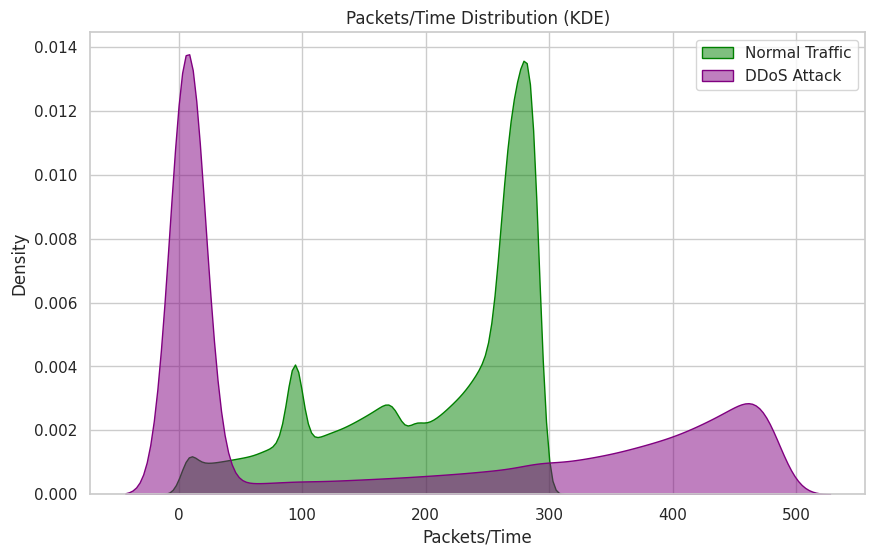

In [17]:
# Plot KDE of Packets/Time Distribution for Normal Traffic vs DDoS Attacks

# Create a KDE plot to show the packets/time distribution for normal traffic vs DDoS attacks
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data[data['target'] == 0]['Packets/Time'], label='Normal Traffic', fill=True, alpha=0.5, color='green')
sns.kdeplot(data=data[data['target'] == 1]['Packets/Time'], label='DDoS Attack', fill=True, alpha=0.5, color='purple')
plt.title('Packets/Time Distribution (KDE)')
plt.xlabel('Packets/Time')
plt.ylabel('Density')
plt.legend()
plt.show()

# Comment: The KDE plot above shows the packets/time distribution for normal traffic and DDoS attacks. By visualizing the density of packets/time for each category, we can identify differences in packet rate patterns between normal traffic and DDoS attacks. This information is valuable for understanding the characteristics of DDoS attacks and identifying potential indicators of such attacks in the network traffic.